In [37]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
import pandas as pd
import seaborn as sns
import io #Used as buffer

In [38]:
nn_p=5
nn_w = 5
nn_tw = 1
m = 'arr'
freq = 40

In [39]:
df = get_data(m)
df = df[(df['nnw']==str(nn_w))&(df['nntw']==str(nn_tw))&(df['nnp']==str(nn_p))|(df['isnn']==False)]

In [40]:
df.rename({'0':m}, axis=1, inplace=True)

# Functions

# Plots

In [41]:
df_pivot = get_heatmap_data(m, df)

In [42]:
df_pivot=df_pivot.query(f'freq=={freq}')

In [43]:
df_pivot_rank = df_pivot.rank(axis=1, ascending=False)

In [44]:
df_pivot_rank.style.background_gradient(cmap=plt.cm.Greens, axis=1)

In [45]:
summary = df_pivot_rank.groupby(['experiment']).mean() #,'function'

summary.round(2).style.background_gradient(cmap=plt.cm.Greens, axis=1)

method,NN_HMu,NN_No,NN_RI,NN_Rst,noNN_HMu,noNN_No,noNN_RI,noNN_Rst
experiment,,,,,,,,
exp1,4.67,6.67,5.67,1.67,3.67,8,3.67,2
exp2,5.67,6.33,5.67,2.67,3,7.67,3.33,1.67
exp3,4.67,6.67,5,1,4.33,7,5.33,2
exp4,4,5,4,2,6,8,4,3


In [46]:
summary.round(2).style.highlight_min(axis=1)

method,NN_HMu,NN_No,NN_RI,NN_Rst,noNN_HMu,noNN_No,noNN_RI,noNN_Rst
experiment,,,,,,,,
exp1,4.67,6.67,5.67,1.67,3.67,8,3.67,2
exp2,5.67,6.33,5.67,2.67,3,7.67,3.33,1.67
exp3,4.67,6.67,5,1,4.33,7,5.33,2
exp4,4,5,4,2,6,8,4,3


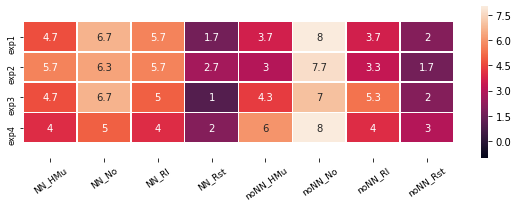

In [48]:
fig,ax = plt.subplots(figsize=(8,3))
sns.heatmap(summary, annot=True, linewidths=.5, ax=ax, cmap=sns.cm.rocket, vmin=-1)
u,l = ax.get_ylim()
ax.set_ylim(u+0.5, l-0.5)
ax.set_ylabel('')
ax.set_xlabel('')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(9)
    tick.label.set_rotation(35)
    
for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(8)
plt.tight_layout()
fig.savefig(PATH_RESULTS/'heatmapRankARR.eps', dpi=400, format='eps')